In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(42)

In [4]:
from ml_algorithms.gda import * 

In [3]:
def add_intercept(x):
    """Add intercept to matrix x.

    Args:
        x: 2D NumPy array.

    Returns:
        New matrix same as x with 1's in the 0th column.
    """
    new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
    new_x[:, 0] = 1
    new_x[:, 1:] = x

    return new_x

def load_dataset(csv_path, label_col='y', add_intercept=False):
    """Load dataset from a CSV file.

    Args:
         csv_path: Path to CSV file containing dataset.
         label_col: Name of column to use as labels (should be 'y' or 'l').
         add_intercept: Add an intercept entry to x-values.

    Returns:
        xs: Numpy array of x-values (inputs).
        ys: Numpy array of y-values (labels).
    """

    def add_intercept_fn(x):
        global add_intercept
        return add_intercept(x)

    # Validate label_col argument
    allowed_label_cols = ('y', 't')
    if label_col not in allowed_label_cols:
        raise ValueError('Invalid label_col: {} (expected {})'
                         .format(label_col, allowed_label_cols))

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
    inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
    labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

    if inputs.ndim == 1:
        inputs = np.expand_dims(inputs, -1)

    if add_intercept:
        inputs = add_intercept_fn(inputs)

    return inputs, labels

In [23]:
train_path = 'dataset/GDA/ds1_train.csv'
eval_path = 'dataset/GDA/ds1_valid.csv'
x_train, y_train = load_dataset(train_path, add_intercept=False)
x_val, y_val = load_dataset(eval_path, add_intercept=True)

In [24]:
print(f'x_train shape: {x_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (800, 2)
x_val shape: (100, 3)
y_train shape: (800,)


In [25]:
model1 = GaussianDiscriminantAnalysis()
model1.fit(x_train, y_train)
yhat = model1.predict(x_val)
preds = yhat >= 0.5 
acc = np.sum(y_val == preds)/preds.shape[0]
print(f'Accuracy on ds1 validation set: {acc}')

Accuracy on ds1 validation set: 0.83


In [26]:
train_path = 'dataset/GDA/ds2_train.csv'
eval_path = 'dataset/GDA/ds2_valid.csv'
x_train, y_train = load_dataset(train_path, add_intercept=False)
x_val, y_val = load_dataset(eval_path, add_intercept=True)

model2 = GaussianDiscriminantAnalysis()
model2.fit(x_train, y_train)
yhat = model2.predict(x_val)
preds = yhat >= 0.5 
acc = np.sum(y_val == preds)/preds.shape[0]
print(f'Accuracy on ds2 validation set: {acc}')


Accuracy on ds2 validation set: 0.91


In [29]:
def plot(x, y, theta, correction=1.0, title=None):
    """Plot dataset and fitted logistic regression parameters.

    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if title:
        plt.title(title)

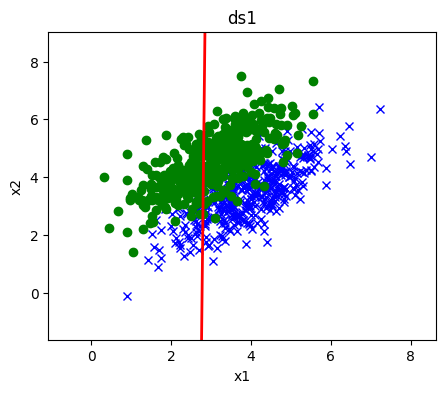

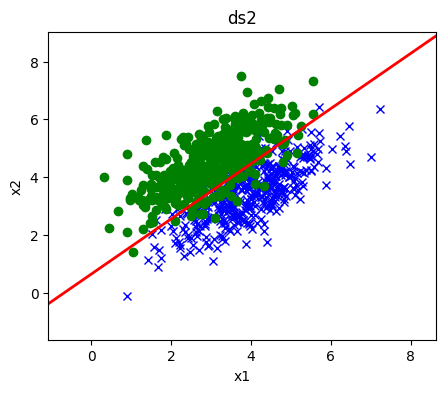

In [31]:
plot(x_train, y_train, model1.theta, title='ds1')
plot(x_train, y_train, model2.theta, title='ds2')


## References
- Standford CS229 (2018) by Professor Andrew Ng.